In [ ]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

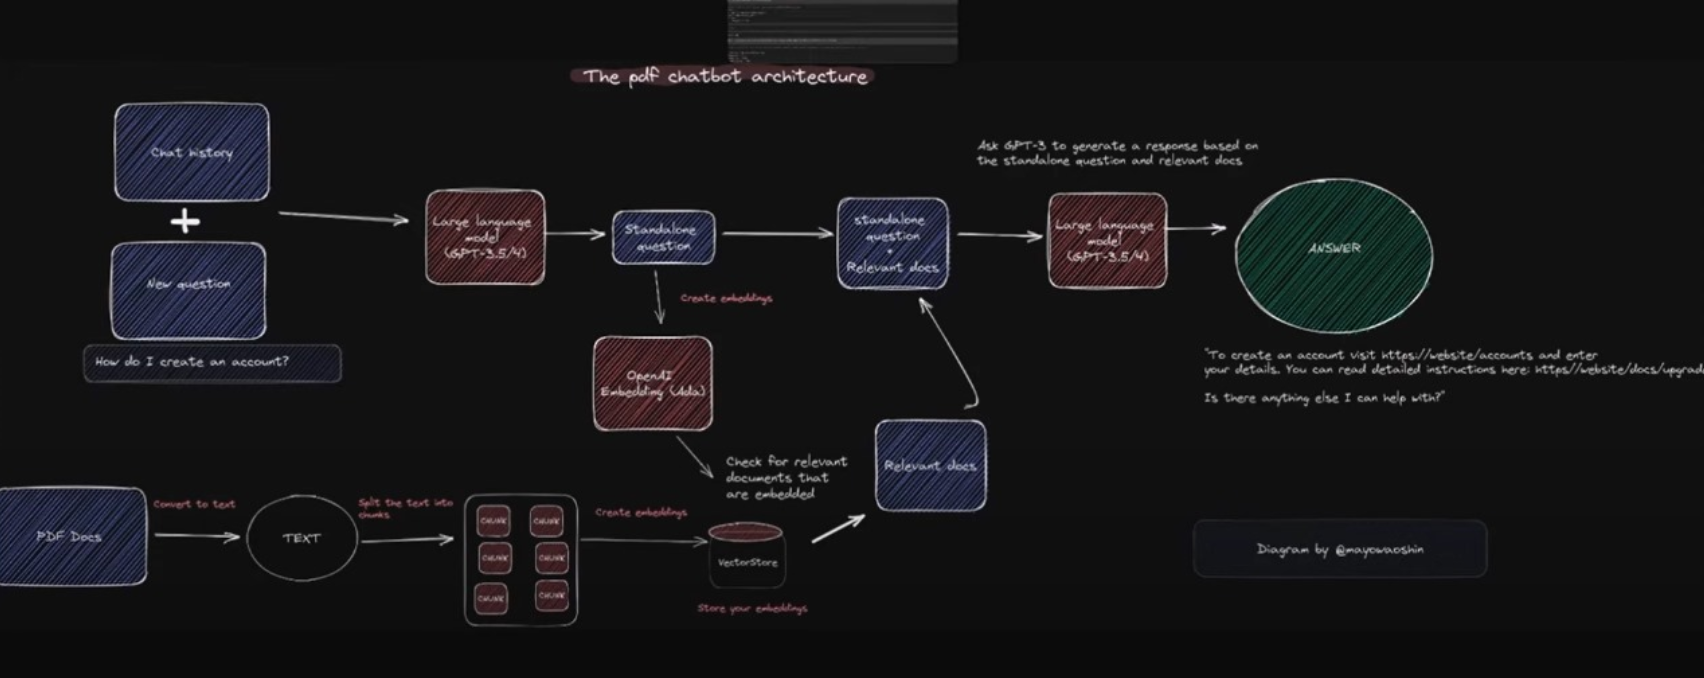

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import ElasticVectorSearch, Pinecone, Weaviate, FAISS

In [ ]:
# Get your API keys from openai, you will need to create an account.
# Here is the link to get the keys: https://platform.openai.com/account/billing/overview
import os
os.environ["OPENAI_API_KEY"] = "insert ur api key here"

In [ ]:
# # connect your Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
# location of the pdf file/files.
reader = PdfReader("/content/journal.pbio.3002492.pdf")

In [ ]:
reader

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [ ]:
# raw_text

In [ ]:
# raw_text[:100]

In [ ]:
# We need to split the text that we read into smaller chunks so that during information retreival we don't hit the token size limits.

text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [ ]:
len(texts)

115

In [ ]:
# texts[0]

In [ ]:
# texts[1]

In [ ]:
# Download embeddings from OpenAI
embeddings = OpenAIEmbeddings()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
docsearch = FAISS.from_texts(texts, embeddings)

In [ ]:
docsearch

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [ ]:
query = "what is this document about??"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' It seems that this document is about a scientific journal called PLOS Biology. It also contains some information about different scientific studies and research. '

In [ ]:
query = "What challenges do researchers face when studying stuttering due to its variability and heterogeneity?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' Researchers face challenges in studying stuttering due to its variability and heterogeneity, as the condition can manifest differently in individuals and may be influenced by various factors such as genetics, environment, and communication styles. This makes it difficult to identify a specific cause or treatment approach for stuttering, and makes it important for researchers to consider these factors when conducting studies.'

In [ ]:
query = "What is Google Bard?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

" I don't know."